In [22]:
import pandas as pd

data = pd.read_csv("Data.csv")

data.head(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [36]:
data.fillna( { "Courier_Experience_yrs" : data["Courier_Experience_yrs"].mean() } , inplace=True )



data.fillna( { "Weather" : str(data["Weather"].mode()) } , inplace=True )
data.fillna( { "Traffic_Level" : str(data["Traffic_Level"].mode()) } , inplace=True )
data.fillna( { "Time_of_Day" : str(data["Time_of_Day"].mode()) } , inplace=True )


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [38]:
num_data = data[[ "Distance_km" , "Preparation_Time_min" , "Courier_Experience_yrs" , "Delivery_Time_min" ]]
num_data.corr()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
Distance_km,1.000000,-0.009037,-0.007713,0.780998
Preparation_Time_min,-0.009037,1.000000,-0.030353,0.307350
Courier_Experience_yrs,-0.007713,-0.030353,1.000000,-0.089066
Delivery_Time_min,0.780998,0.307350,-0.089066,1.000000


## Countplots pour visualiser la distribution des variables catégorielles

<Axes: >

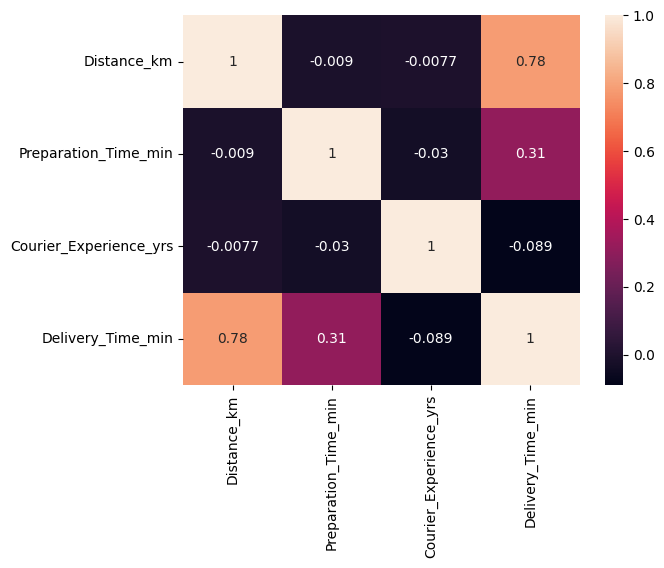

In [42]:
import seaborn as sns

sns.heatmap( num_data.corr() , annot=True )

In [ ]:
import matplotlib as plt

